In [2]:
import pandas as pd
import numpy as np
from pylab import*
import matplotlib.pyplot as plt
%matplotlib inline
import SingleVariableRegression as svr

## Single Variable Regression 

### (a)Load each of the single feature data sets and plot the data to get an idea of the complexity of the problem

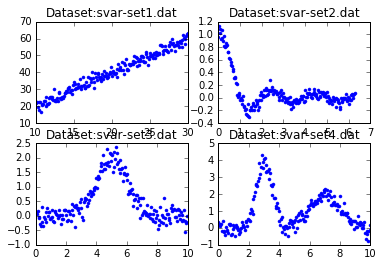

In [3]:

for i in range(1,5):
    filename = "svar-set"+str(i)+".dat"
    x,y = svr.readfile(filename)
    plt.subplot(2, 2,i)
    plt.plot(x, y, 'b.')
    plt.title("Dataset:"+filename)
plt.show() 

### (b) Fit a linear model to the data. Compute the training and testing error, and compare them. Plot the regression model you obtain on top of the test data.


svar-set1.dat
Using linear regression:


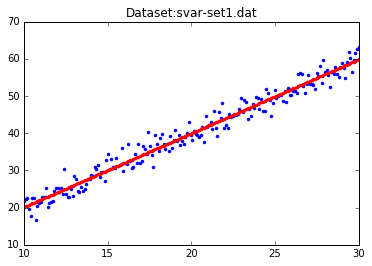

Average training MSE is 4.21873881409
Average training RSE is 0.00365123542701
Average testing MSE is 4.60347670808
Average testing RSE is 0.00455975291433

svar-set2.dat
Using linear regression:


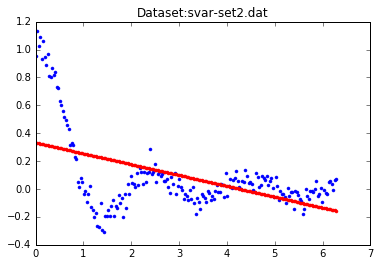

Average training MSE is 0.0593449271266
Average training RSE is 103.02901792
Average testing MSE is 0.0647702722454
Average testing RSE is 21.2053909517

svar-set3.dat
Using linear regression:


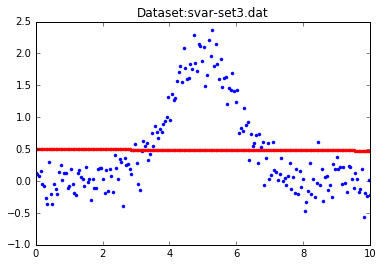

Average training MSE is 0.498433634011
Average training RSE is 97.4862069937
Average testing MSE is 0.507758861676
Average testing RSE is 107.136674211

svar-set4.dat
Using linear regression:


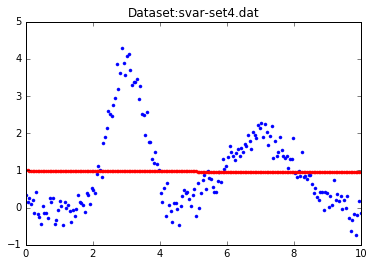

Average training MSE is 1.20309233677
Average training RSE is 1641.43431779
Average testing MSE is 1.17203349855
Average testing RSE is 3370.13903334


In [4]:
for i in range(1,5):
    filename = "svar-set"+str(i)+".dat"
    print '\n',filename
    print 'Using linear regression:'
    svr.CrossValidation(filename, printLinear = True,k = 10, shuffle =  True)

#### Linear model works well only on the first dataset, all the other 3 datasets get very high RSE values. This means that linear model doesn't fit them well.

### (c) Compare the results you obtain to the one obtained by the ready made Python function.

In [5]:
from sklearn import linear_model
for i in range(1,5):
    filename = "svar-set"+str(i)+".dat"
    x,y = svr.readfile(filename)

    a = x.flatten()
    b = y.flatten()
    reg = linear_model.LinearRegression()
    reg.fit(x,y)

    coef = reg.coef_
    inte = reg.intercept_ 
    pre_y = coef*x+inte
    m = (pre_y-y)
    d_MSE = np.sum(np.power(m,2))/m.size
    d_RSE = np.sum((np.power(m,2)) / np.square(y))/m.size
    print filename,': '
    print 'MSE of ready made fuction is', d_MSE
    print 'RSE of ready made fuction is', d_RSE,'\n'

svar-set1.dat : 
MSE of ready made fuction is 4.23257061574
RSE of ready made fuction is 0.00368320827643 

svar-set2.dat : 
MSE of ready made fuction is 0.0595726065787
RSE of ready made fuction is 100.774584262 

svar-set3.dat : 
MSE of ready made fuction is 0.49871388977
RSE of ready made fuction is 97.5723677492 

svar-set4.dat : 
MSE of ready made fuction is 1.20080807429
RSE of ready made fuction is 1710.07258337 



#### The MSE and RSE of my trainning parts are similar with ready build fuction from package sklearn.

### (d) Test different polynomial models on different subsets of the data. Choose a single polynomial mode l and justify your selection. Repeat the evaluation procedure as above.

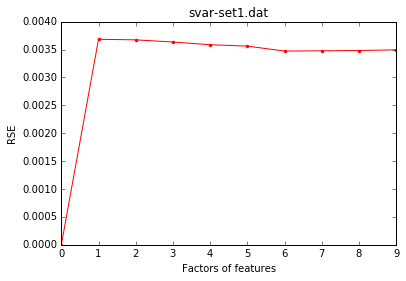

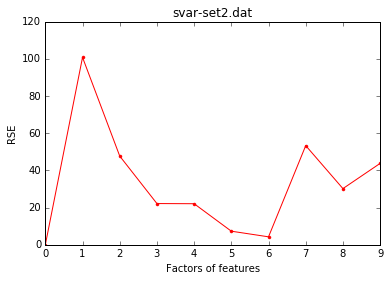

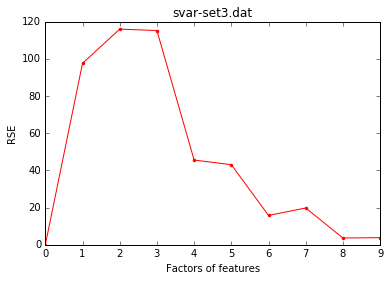

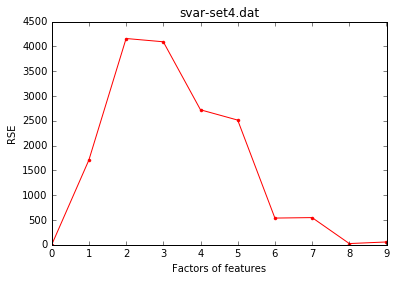

In [6]:

for i in range(1,5):
    filename = "svar-set"+str(i)+".dat"    
    svr.CrossValidation(filename, fit = 10)

#### Compute of the RSE of different datasets by increasing the polynomial from x^1 to x^10 :
#### a) For svar-set1.dat: RSEs of all factors looks the similar. Consider of the risk of overfitting, factor =1 is the best choice.
#### b) For svar-set2.dat: When factor = 6, RSE has the lowest value. But consider of the potencial of overfitting, So the best polynomial model is factor = 3. 
#### c) For svar-set3.dat: Even the RSE value of factor equals 8 and 9 are better, consider of the potencial of overfitting, the best choice is factor = 6.
#### d) For svar-set4.dat: Consider of the potencial of overfitting, the best choice is factor = 8.


### (e) Reduce the amount of training data you use and observe the effect of performance of the linear and polynomial models.

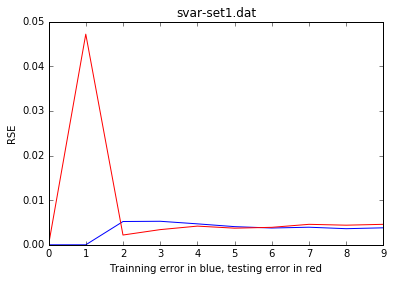

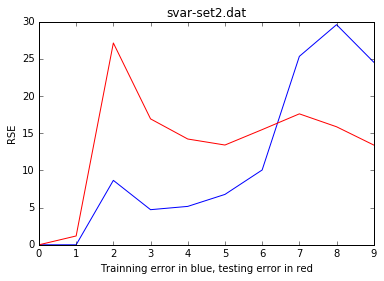

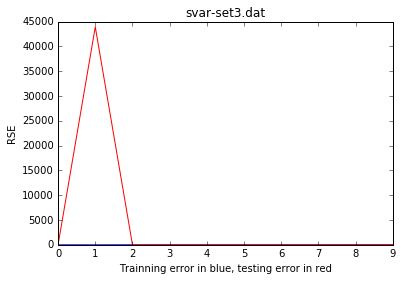

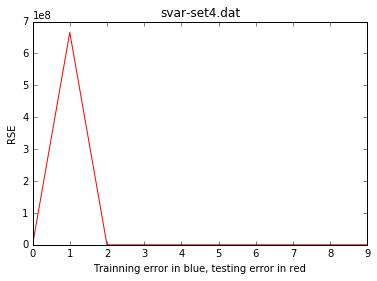

In [7]:
list = [1,3,6,8]
for i in range(1,5):
    
    fn = "svar-set"+str(i)+".dat"   
    feature,y = svr.readfile(fn)
    z = svr.trans_X(feature,list[i-1])
    x = z[:,1:]
    svr.d_reduce(x,y,1.0,fn)
    

#### I use same test sets but reduce the trainning part.
#### From the forms, we can see with the increasing abount of of trainning size, both trainning errors and testing errors decreases. The higher polynomial of x, the faster decresing of the errrors.